Anatomical file: C:/Users/eldad/Desktop/Università/VRIJE UNIVERSITY/Programming/fMRI anxiety disorders\anatomical.nii.gz
Functional file: C:/Users/eldad/Desktop/Università/VRIJE UNIVERSITY/Programming/fMRI anxiety disorders\anxiety disorders_uniformity-test_z_FDR_0.01.nii.gz


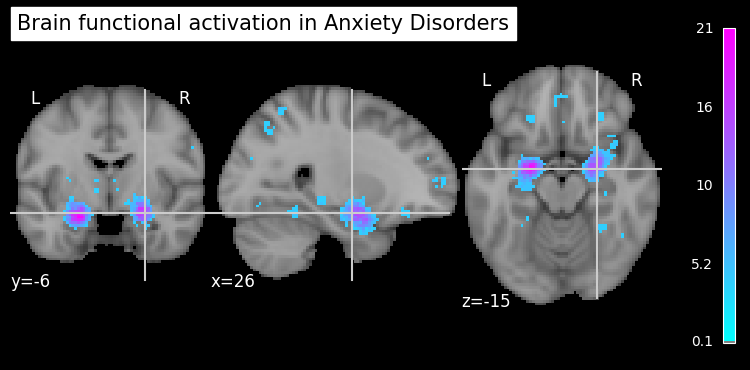

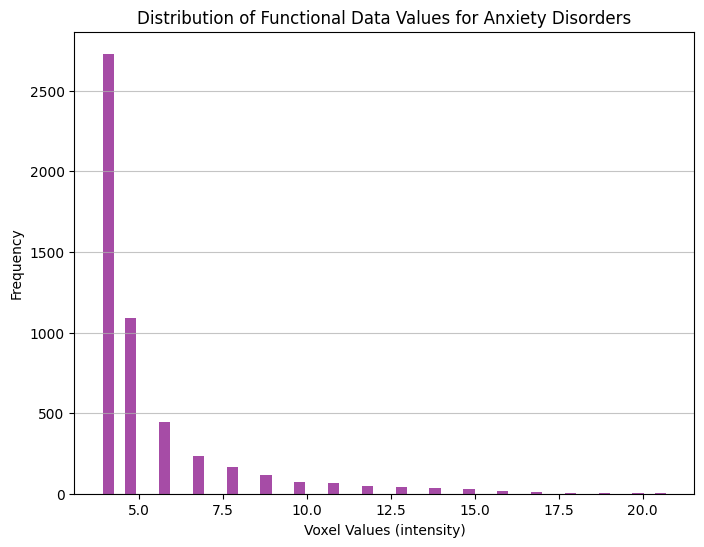

In [4]:
# import all libraries needed
import os
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np

# step number 1: find the fMRI data files
# import .nii.gz files in this directory
def find_mri_files(folder):
    anatomical_file = None
    functional_file = None
    for file in os.listdir(folder):
        if "anatomical" in file.lower() and file.endswith(".nii.gz"):
            anatomical_file = os.path.join(folder, file)
        elif "uniformity" in file.lower() and file.endswith(".nii.gz"):
            functional_file = os.path.join(folder, file)
    return anatomical_file, functional_file

# giving the folder path where to get the file
folder_path = "C:/Users/eldad/Desktop/Università/VRIJE UNIVERSITY/Programming/fMRI anxiety disorders"
anatomical_file, functional_file = find_mri_files(folder_path)

if not anatomical_file or not functional_file:
    raise FileNotFoundError("Ensure both anatomical and functional .nii.gz files are in the folder.")

print("Anatomical file:", anatomical_file)
print("Functional file:", functional_file)

# step number 2: loading the files using Nibabel
anatomical_img = nib.load(anatomical_file)
functional_img = nib.load(functional_file)

# step number 3: Visualization of the functional data into the the anatomical scan
from nilearn import plotting

# customization of the visualization
from nilearn import plotting

# changing and personalizing the visualization for brainamp
plotting.plot_stat_map(
    functional_img,  # functional data file
    bg_img=anatomical_img,  # anatomical background
    title="Brain functional activation in Anxiety Disorders",  # title name
    threshold=0.1,  # excluding values below voxel thershold lv
    display_mode="ortho",  # orthogonal view
    cut_coords=(26, -6, -15), #xyz
    cmap="cool"  # colour 
)

plotting.show()



import matplotlib.pyplot as plt
import numpy as np

# step number 4: histogram 
# upload the functional data as a NumPy array
functional_data = functional_img.get_fdata()

# only positive values 
positive_values = functional_data[functional_data > 0]

# plottin the histogram and customization of it
plt.figure(figsize=(8, 6))
plt.hist(positive_values, bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Functional Data Values for Anxiety Disorders")  # set title
plt.xlabel("Voxel Values (intensity)")  # X-axis name
plt.ylabel("Frequency")  # Y-axis name
plt.grid(axis='y', alpha=0.75)
plt.show()




